<a href="https://colab.research.google.com/github/krishna110597/Sentiment-Analysis/blob/main/Multi_Emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install NRCLex

     |████████████████████████████████| 396 kB 4.4 MB/s 
  Created wheel for NRCLex: filename=NRCLex-3.0.0-py3-none-any.whl size=43329 sha256=22992d719a57fde1f08ca903aa81e26b3a0571e4615252ce831b081b91610de3
  Stored in directory: /root/.cache/pip/wheels/af/2c/9c/dfa19d1b65326c520b32850a9311f6d4eda679ac04dba26081
Successfully built NRCLex


In [ ]:
from nrclex import NRCLex

In [ ]:
text = ['extremely',
'disturbing',
'reports',
'from',
'spread,'
'in',
'rural',
'areas',
'is',
'much',
'higher', 'people','are',
'afraid',
'of',
'rapid',
'spread',
'due',
'to',
'political',
'activity']

In [ ]:
text = ['as','delhi', 'reported', 'highest','single-day','spike','with','new','cases','and','deaths','amidst','shortage','beds','hotels',
'banquets',
'set',
'aside',
'beds',
'covid',
'patients']

In [ ]:
emotion = NRCLex.lexicon['fake']

In [ ]:
len(NRCLex.lexicon)

6468

In [ ]:

!mkdir -p data
!wget -nc https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/upshot-trump-emolex/data/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt -P data

--2022-05-03 13:42:02--  https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/upshot-trump-emolex/data/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt
Resolving nyc3.digitaloceanspaces.com (nyc3.digitaloceanspaces.com)... 162.243.189.2
Connecting to nyc3.digitaloceanspaces.com (nyc3.digitaloceanspaces.com)|162.243.189.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2581050 (2.5M) [text/plain]
Saving to: ‘data/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt’

NRC-emotion-lexicon 100%[===================>]   2.46M  --.-KB/s    in 0.1s    

2022-05-03 13:42:02 (21.0 MB/s) - ‘data/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt’ saved [2581050/2581050]



In [ ]:
import pandas as pd

In [ ]:
filepath = "data/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t', keep_default_na=False)
emolex_df.head(12)

,word,emotion,association
0,aback,anger,0
1,aback,anticipation,0
2,aback,disgust,0
3,aback,fear,0
4,aback,joy,0
5,aback,negative,0
6,aback,positive,0
7,aback,sadness,0
8,aback,surprise,0
9,aback,trust,0


In [ ]:
emolex_df.emotion.unique()

array(['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative',
       'positive', 'sadness', 'surprise', 'trust'], dtype=object)

In [ ]:
emolex_df.emotion.value_counts()

anger           14182
anticipation    14182
disgust         14182
fear            14182
joy             14182
negative        14182
positive        14182
sadness         14182
surprise        14182
trust           14182
Name: emotion, dtype: int64

In [ ]:
emolex_df[emolex_df.association == 1].emotion.value_counts()

negative        3324
positive        2312
fear            1476
anger           1247
trust           1231
sadness         1191
disgust         1058
anticipation     839
joy              689
surprise         534
Name: emotion, dtype: int64

In [ ]:
emolex_words = emolex_df.pivot(index='word', columns='emotion', values='association').reset_index()
emolex_words.head()

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,aback,0,0,0,0,0,0,0,0,0,0
1,abacus,0,0,0,0,0,0,0,0,0,1
2,abandon,0,0,0,1,0,1,0,1,0,0
3,abandoned,1,0,0,1,0,1,0,1,0,0
4,abandonment,1,0,0,1,0,1,0,1,1,0


In [ ]:
emolex_words[emolex_words.word == 'masquerader']

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust


In [ ]:
EmoWords = pd.DataFrame()
for i in range(len(text)):
    # Create object
    #motion = NRCLex(text[i])
    EmoWords = EmoWords.append(emolex_words[emolex_words.word == text[i]])
    # Classify emotion
    #print('\n\n', text[i], ': ', emolex_words[emolex_words.word == 'fake'])
#print(EmoWords)
EmoWords

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
10541,reported,0,0,0,0,0,0,0,0,0,0
5975,highest,0,1,0,1,1,1,1,0,1,0
11834,spike,0,0,0,1,0,0,0,0,0,0
457,amidst,0,0,0,0,0,0,0,0,0,0
11377,shortage,1,0,0,1,0,1,0,1,0,0
11262,set,0,0,0,0,0,0,0,0,0,0


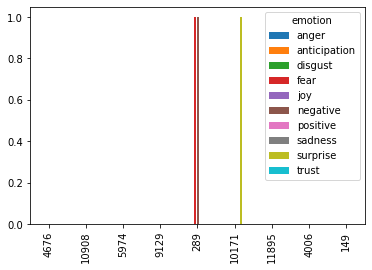

In [ ]:
import matplotlib.pyplot as plt
EmoWords.plot(kind='bar')
plt.show()